<h1>2022.03.17. 강의 시간내 실습</h1>

<h2>Dataset 로드 및 내용 확인</h2>

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns

In [75]:
salary = pd.read_csv("C:/ai_dataset/Salary_Data.csv", index_col = 0)

In [76]:
salary

,YearsExperience,Salary
index,,
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642
7,3.0,60150
8,3.2,54445
9,3.2,64445


In [77]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


<h2>Linear Regression</h2>

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
year = np.array(salary['YearsExperience'])
salary_x = np.array(salary['Salary'])

In [80]:
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(year, salary_x, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [81]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [82]:
import matplotlib.pyplot as plt

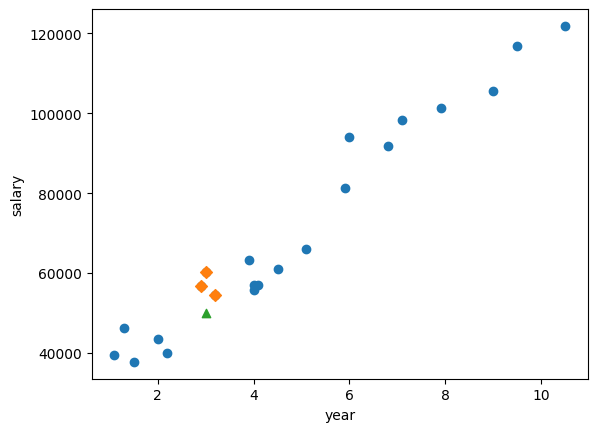

In [83]:
distances, indexes = knr.kneighbors([[3]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(3, 50000, marker='^')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [84]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [85]:
print(lr.predict([[3]]))

[53591.17567509]


In [86]:
print(lr.coef_, lr.intercept_)

[9371.0160797] 25478.12743600038


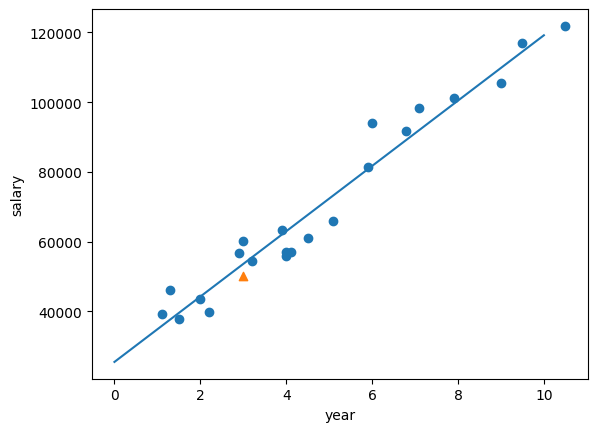

In [90]:
plt.scatter(train_input, train_target)

plt.plot([0, 10], [0*lr.coef_+lr.intercept_, 10*lr.coef_+lr.intercept_])

plt.scatter(3, 50000, marker='^')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

<h2>Accuracy</h2>

In [88]:
accuracy = knr.score(test_input, test_target)

print(accuracy)

0.9333975320508355


<h2>EDA</h2>

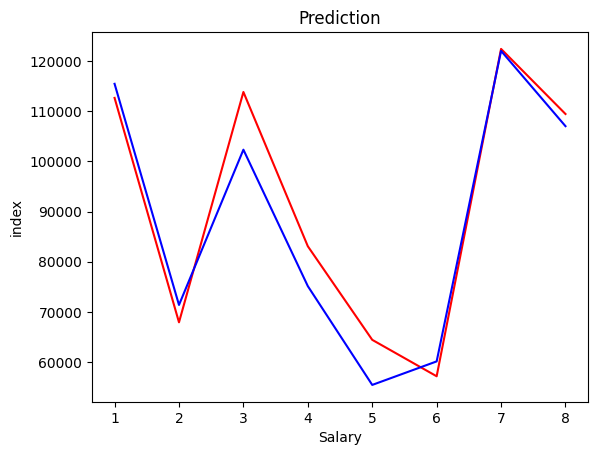

In [89]:
c = [i for i in range (1,len(test_target)+1,1)]
plt.plot(c, test_target, color='r',linestyle='-')
plt.plot(c, lr.predict(test_input), color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

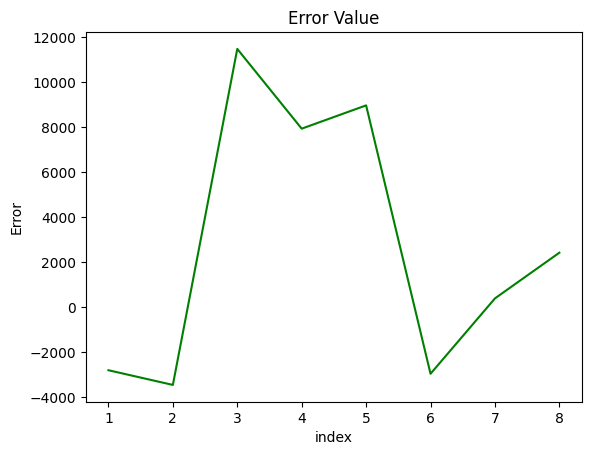

In [91]:
c = [i for i in range(1,len(test_target)+1,1)]
plt.plot(c, test_target-lr.predict(test_input), color='green', linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()